#Connect to Big Query

In [ ]:
from google.cloud import bigquery
import pandas as pd

# Initialize BigQuery client
client = bigquery.Client(project='employee-churn-59343')

# Query to load merged data
query = """
SELECT * FROM `employee-churn-59343.employeedata.FullMergedDatasets`
"""

# Load data into a DataFrame
df = client.query(query).to_dataframe()
df.head()

,employee_id,department,years_at_company,attrition_status,satisfaction_level
0,None,Research & Development,0.0,false,3.0
1,None,Research & Development,0.0,false,1.0
2,None,Research & Development,1.0,false,4.0
3,None,Research & Development,1.0,true,1.0
4,None,Research & Development,1.0,false,1.0


In [ ]:
df.tail()

,employee_id,department,years_at_company,attrition_status,satisfaction_level
116626,EMP15000,Departments,NaN,1,0.40
116627,EMP15001,Departments,NaN,1,0.37
116628,EMP15002,Departments,NaN,1,0.37
116629,EMP15003,Departments,NaN,1,0.11
116630,EMP15004,Departments,NaN,1,0.37


In [ ]:
new_table_ref = dataset.table('tbl_new_employees')
new_table = client.get_table(new_table_ref)
new_table.schema

[SchemaField('satisfaction_level', 'FLOAT', 'NULLABLE', None, None, (), None),
 SchemaField('last_evaluation', 'FLOAT', 'NULLABLE', None, None, (), None),
 SchemaField('number_project', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('average_montly_hours', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('time_spend_company', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Work_accident', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Quit_the_Company', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('promotion_last_5years', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Departments', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('salary', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('employee_id', 'STRING', 'NULLABLE', None, None, (), None)]

# Preprocess Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Drop rows with missing values
df = df.dropna()

# Encode categorical features
le = LabelEncoder()
df['department'] = le.fit_transform(df['department'])
df['attrition_status'] = le.fit_transform(df['attrition_status'])

# Define features and target
X = df[['department', 'years_at_company', 'satisfaction_level']]
y = df['attrition_status']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<ipython-input-8-887ce304bf52>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['department'] = le.fit_transform(df['department'])


# Train Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Evaluate the Model

Accuracy: 0.8897329281944667
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      8699
           1       0.89      0.92      0.91      1449
           2       0.47      0.39      0.43      1058
           3       0.57      0.65      0.61      1300

    accuracy                           0.89     12506
   macro avg       0.73      0.73      0.73     12506
weighted avg       0.89      0.89      0.89     12506



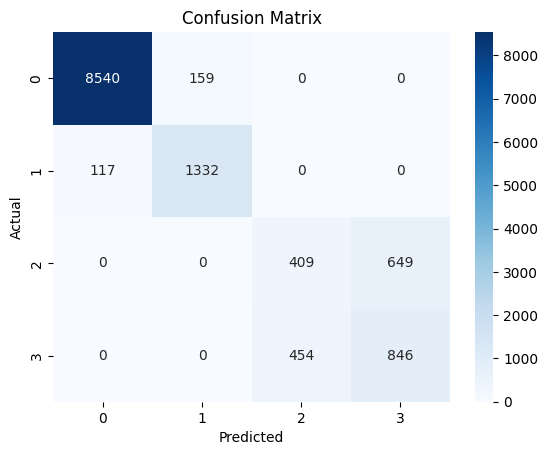

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = rf.predict(X_test)

# Print metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Feature Importance Visualization

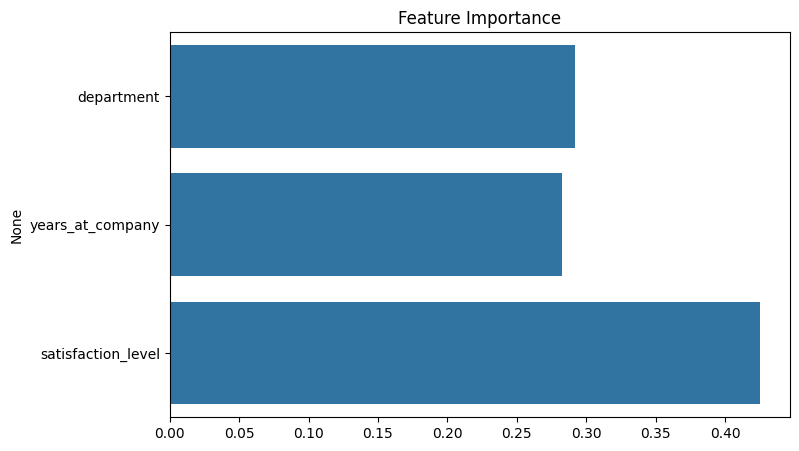

In [ ]:
# Feature Importance
importances = rf.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.show()


In [ ]:
import pandas as pd

# Assuming you have X_test and y_pred
results = pd.DataFrame(X_test)
results['predicted_attrition'] = y_pred

# Optional: include actual labels if available
# results['actual_attrition'] = y_test

results.to_csv("attrition_predictions.csv", index=False)
